In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

env_var = os.environ
os.environ["LACE_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE"
os.environ["LACE_MANAGER_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE_manager"

In [3]:
from lace.emulator_nn.network import MDNemulator_polyfit
from lace.emulator.nn_emulator import NNEmulator
from lace.emulator.test_simulation_nn import test_sim
from lace.emulator import pd_archive

from lace.cosmo import camb_cosmo

cosmo_fid=camb_cosmo.get_cosmology()

/data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 /data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/lace-1.0.1-py3.10.egg/lace/emulator/pd_archive.py:210: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/lace-1.0.1-py3.10.egg/lace/emulator/pd_archive.py:210: SyntaxWarning:"is" with a literal. Did you mean "=="?


In [29]:
from matplotlib import rcParams
rcParams["mathtext.fontset"] = "stix"
rcParams["font.family"] = "STIXGeneral"

In [4]:
emu_type = 'polyfit'
archive=pd_archive.archivePD(z_max=4.5,nsamples=30)
archive.average_over_samples(flag="all")
archive.average_over_samples(flag="phases")
archive.average_over_samples(flag="axes")
archive.input_emulator(flag="all")
archive.input_emulator(flag="phases")
archive.input_emulator(flag="axes")

In [5]:
emu_type = 'polyfit'
archive_scalings=pd_archive.archivePD(z_max=4.5,nsamples=30)
archive_scalings.average_over_samples(flag="all")
archive_scalings.average_over_samples(flag="phases")
archive_scalings.average_over_samples(flag="axes")
archive_scalings.input_emulator(flag="all")
archive_scalings.input_emulator(flag="phases")
archive_scalings.input_emulator(flag="axes")

In [6]:
central=pd_archive.archivePD(z_max=4.5,pick_sim='central')
central.average_over_samples(flag="all")
central.data_av_all = [d for d in central.data_av_all if d['scale_tau'] == 1] 


P18=pd_archive.archivePD(z_max=4.5,pick_sim='diffigm')
P18.average_over_samples(flag="all")
P18.data_av_all = [d for d in P18.data_av_all if d['scale_tau'] == 1] 


 /tmp/ipykernel_263/2773002114.py:35: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


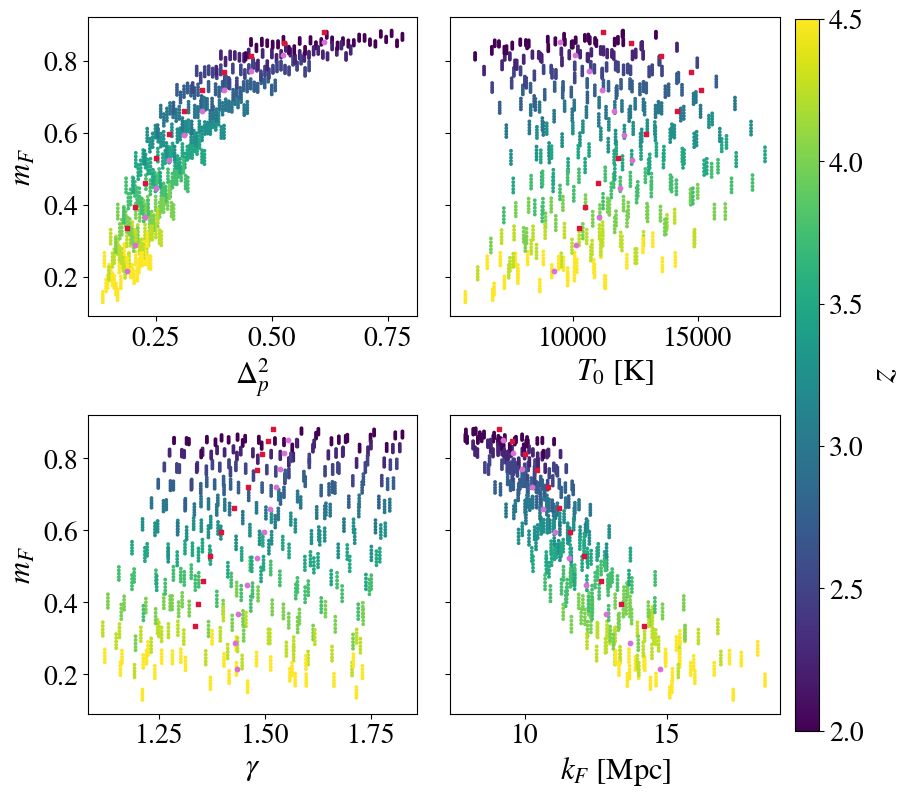

In [28]:
import matplotlib.pyplot as plt

params = ['Delta2_p', 'T0', 'gamma', 'kF_Mpc']
params_labs = [r'$\Delta^2_p$', r'$T_0$ [K]' , r'$\gamma$', r'$k_F$ [Mpc]']

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20 )

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharey=True, sharex=False)

# Loop over the parameters and plot the data
scatter = None # Initialize the scatter plot object
for j, param in enumerate(params):
    row = j // 2 # Determine the row index based on the parameter index
    col = j % 2 # Determine the column index based on the parameter index
    ax = axes[row, col] # Get the appropriate subplot
    
    # Plot the data
    scatter = ax.scatter([d[param] for d in archive_scalings.data_av_all], [d['mF'] for d in archive_scalings.data_av_all], c=[d['z'] for d in archive_scalings.data_av_all], s=3,rasterized=True)
    ax.scatter([d[param] for d in central.data_av_all], [d['mF'] for d in central.data_av_all], c='orchid', s=10, label = 'Central',rasterized=True)
    ax.scatter([d[param] for d in P18.data_av_all], [d['mF'] for d in P18.data_av_all],  marker= 's', c='crimson', s=10, label = 'P18',rasterized=True)
    
    # Set the x and y labels
    ax.set_xlabel(params_labs[j], fontsize=22)
    if col == 0:
        ax.set_ylabel(r'$m_F$', fontsize=22)    
    #ax.legend(fontsize = 14)

# Add a single colorbar for all subplots
cax = fig.add_axes([1, .089, .03, 0.89])
cb = fig.colorbar(scatter, ax=axes[:, -1],  cax=cax)
cb.set_label(r'$z$', fontsize=26)

plt.tight_layout() # Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1) # Adjust horizontal spacing between subplots
plt.savefig('P18.pdf', bbox_inches='tight')


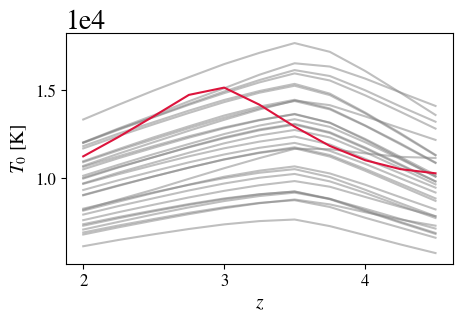

In [30]:
plt.figure(figsize=(5,3))
for i in range(30):
    s=pd_archive.archivePD(z_max=4.5,pick_sim=i)
    s.average_over_samples(flag="all")
    s.data_av_all = [d for d in s.data_av_all if d['scale_tau'] == 1] 

    
    plt.plot([d['z'] for d in s.data_av_all], [d['T0'] for d in s.data_av_all], color='grey', alpha = 0.5)
    
s=pd_archive.archivePD(z_max=4.5,pick_sim='diffigm')
s.average_over_samples(flag="all")
s.data_av_all = [d for d in s.data_av_all if d['scale_tau'] == 1] 
plt.plot([d['z'] for d in s.data_av_all], [d['T0'] for d in s.data_av_all], color='crimson')

plt.xlabel(r'$z$', fontsize=14)
plt.ylabel(r'$T_0$ [K]', fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Tz_P18.pdf', bbox_inches='tight')